한전사이트

https://home.kepco.co.kr/kepco/KO/ntcob/ntcobView.do?boardSeq=21047284&parnScrpSeq=21052341&depth=0&boardNo=0&boardCd=BRD_000283&replyRole=&pageIndex=1&searchKeyword=&searchCondition=total&menuCd=FN05030105

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# 2020년 전력사용량 

In [27]:
elec20 = pd.read_excel('./hanelec2020.xlsx', header = 2)       # 필요없는 부분 제거
elec20_1 = elec20.copy()                                                       
elec20_1

,연도,시도,시군구,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2020,서울특별시,종로구,주택용,23282355,22805944,21157407,20528809,19532519,21593865,23510494,26870726,26624205,19920762,20468684,0
1,2020,서울특별시,종로구,일반용,114495623,105338838,94326383,83914212,83334611,98931540,107842159,112964562,102740211,81058173,86290766,0
2,2020,서울특별시,종로구,교육용,9559773,8855042,6872377,5909347,5559426,7043982,7934770,8415305,8034215,5951326,7044572,0
3,2020,서울특별시,종로구,산업용,6335667,6493638,6251995,5800648,5255774,6095093,6437129,5732473,6274032,4784933,5292240,0
4,2020,서울특별시,종로구,농사용,4382,3711,3240,2617,1477,933,799,724,585,529,870,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,2020,세종특별자치시,세종시,합 계,288844593,283274957,280548852,264606519,252302181,269349039,284686589,294023468,310726055,266062281,288055505,0
1830,2020,황해북도,개성시,주택용,10598,0,5299,2650,2650,0,721,0,0,0,25140,0
1831,2020,황해북도,개성시,일반용,0,326406,102394,50873,51817,1505,27638,0,0,0,482824,0
1832,2020,황해북도,개성시,산업용,0,181140,78310,40166,40166,2020,22115,0,0,0,396468,0


In [28]:
elec20_1 = elec20_1[elec20_1['계약종별']!='합 계']    #합계가 중간중간 있어 제외시켜 수치를 정확히 파악할수 있게 만들기
elec20_1

,연도,시도,시군구,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2020,서울특별시,종로구,주택용,23282355,22805944,21157407,20528809,19532519,21593865,23510494,26870726,26624205,19920762,20468684,0
1,2020,서울특별시,종로구,일반용,114495623,105338838,94326383,83914212,83334611,98931540,107842159,112964562,102740211,81058173,86290766,0
2,2020,서울특별시,종로구,교육용,9559773,8855042,6872377,5909347,5559426,7043982,7934770,8415305,8034215,5951326,7044572,0
3,2020,서울특별시,종로구,산업용,6335667,6493638,6251995,5800648,5255774,6095093,6437129,5732473,6274032,4784933,5292240,0
4,2020,서울특별시,종로구,농사용,4382,3711,3240,2617,1477,933,799,724,585,529,870,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,2020,세종특별자치시,세종시,가로등,3129936,3016862,2781722,2725383,2529567,2403537,2296629,2415861,2499574,2737621,3009482,0
1828,2020,세종특별자치시,세종시,심 야,12330004,11977089,9779815,7694798,4943733,2601958,1745108,1831156,1608072,2942398,6721092,0
1830,2020,황해북도,개성시,주택용,10598,0,5299,2650,2650,0,721,0,0,0,25140,0
1831,2020,황해북도,개성시,일반용,0,326406,102394,50873,51817,1505,27638,0,0,0,482824,0


In [29]:
elec20_1 = elec20_1.drop(['시도','연도','시군구'],axis=1)   #사용하지 않을 column 탈락
elec20_1

,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,주택용,23282355,22805944,21157407,20528809,19532519,21593865,23510494,26870726,26624205,19920762,20468684,0
1,일반용,114495623,105338838,94326383,83914212,83334611,98931540,107842159,112964562,102740211,81058173,86290766,0
2,교육용,9559773,8855042,6872377,5909347,5559426,7043982,7934770,8415305,8034215,5951326,7044572,0
3,산업용,6335667,6493638,6251995,5800648,5255774,6095093,6437129,5732473,6274032,4784933,5292240,0
4,농사용,4382,3711,3240,2617,1477,933,799,724,585,529,870,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,가로등,3129936,3016862,2781722,2725383,2529567,2403537,2296629,2415861,2499574,2737621,3009482,0
1828,심 야,12330004,11977089,9779815,7694798,4943733,2601958,1745108,1831156,1608072,2942398,6721092,0
1830,주택용,10598,0,5299,2650,2650,0,721,0,0,0,25140,0
1831,일반용,0,326406,102394,50873,51817,1505,27638,0,0,0,482824,0


In [30]:
elec20_1 = elec20_1.groupby('계약종별')['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'].sum()
elec20_1                           # groupby로 각 사용처별 전력사용량 합치기

C:\Users\User\AppData\Local\Temp/ipykernel_11052/3382492966.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  elec20_1 = elec20_1.groupby('계약종별')['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'].sum()


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
계약종별,,,,,,,,,,,,
가로등,335654182,320886919,299908715,292800574,271180524,259418696,252123694,261811631,275662605,297733045,316285756,0
교육용,871390812,743562619,596477786,489662259,431194113,532529995,627728318,644946258,614697966,472990422,626306217,0
농사용,1846298479,1843176766,1646756838,1529677038,1336040544,1381353690,1354309804,1609924704,1713038135,1310423818,1747248454,0
산업용,24157032215,22987544986,23829266382,22635639478,21748720489,22103410561,23468351063,23505722974,24013797681,22622537999,23041292583,0
심 야,1674014847,1644170990,1333189297,1065384823,747888242,475031079,363774145,402060070,330691778,430885998,854928945,0
일반용,10980217599,10489575610,9114577266,8361003602,8065899725,9070383893,9832290436,10795212574,10303052743,8164536180,8562683989,0
주택용,6462307370,6469949473,6050608791,6101122110,5726791865,5930765224,6169242099,7379537865,7859851045,5766204092,5998341336,0


In [55]:
elec20_2=np.transpose(elec20_1)        #  보기 쉽게 row를 월별로 행렬을 전환
elec20_2

계약종별,가로등,교육용,농사용,산업용,심 야,일반용,주택용
1월,335654182,871390812,1846298479,24157032215,1674014847,10980217599,6462307370
2월,320886919,743562619,1843176766,22987544986,1644170990,10489575610,6469949473
3월,299908715,596477786,1646756838,23829266382,1333189297,9114577266,6050608791
4월,292800574,489662259,1529677038,22635639478,1065384823,8361003602,6101122110
5월,271180524,431194113,1336040544,21748720489,747888242,8065899725,5726791865
6월,259418696,532529995,1381353690,22103410561,475031079,9070383893,5930765224
7월,252123694,627728318,1354309804,23468351063,363774145,9832290436,6169242099
8월,261811631,644946258,1609924704,23505722974,402060070,10795212574,7379537865
9월,275662605,614697966,1713038135,24013797681,330691778,10303052743,7859851045
10월,297733045,472990422,1310423818,22622537999,430885998,8164536180,5766204092


# 2019년 전력사용량 

In [56]:
elec19 = pd.read_excel('./hanelec2019.xlsx', header = 2)
elec19_1 = elec19.copy()                                                       
elec19_1

,연도,시도,시군구,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2019,서울특별시,종로구,주택용,24160644,22883203,20039084,20570833,19156656,20278012,22919604,29492782,24800305,20050769,20033320,21855205
1,2019,서울특별시,종로구,일반용,120079512,110317701,93294299,93421543,90325483,98303377,113573453,126148808,110010554,93117616,90242284,106536361
2,2019,서울특별시,종로구,교육용,10204144,9435056,7662196,7881974,6729563,7825646,8631354,9303561,9002269,7322515,7300834,9780051
3,2019,서울특별시,종로구,산업용,6683559,6900078,6731342,7095902,6192349,6372283,6403721,6859148,7011859,5961664,5682268,6223492
4,2019,서울특별시,종로구,농사용,7065,5975,4408,4559,985,754,673,840,741,621,592,3358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,2019,세종특별자치시,세종시,합 계,292024552,266667611,259635613,259582358,250007849,255500866,274188634,289289047,276593028,260172385,263660812,278856325
1830,2019,황해북도,개성시,주택용,10937,9169,9446,7492,6678,6890,8939,10516,8348,7646,9284,10598
1831,2019,황해북도,개성시,일반용,348006,251923,190158,138255,90389,87695,111074,124581,98703,107756,197942,326406
1832,2019,황해북도,개성시,산업용,166936,142981,139741,120540,116713,111140,119631,127520,119255,122606,138500,181140


In [57]:
elec19_1 = elec19_1[elec19_1['계약종별']!='합 계']  
elec19_1

,연도,시도,시군구,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2019,서울특별시,종로구,주택용,24160644,22883203,20039084,20570833,19156656,20278012,22919604,29492782,24800305,20050769,20033320,21855205
1,2019,서울특별시,종로구,일반용,120079512,110317701,93294299,93421543,90325483,98303377,113573453,126148808,110010554,93117616,90242284,106536361
2,2019,서울특별시,종로구,교육용,10204144,9435056,7662196,7881974,6729563,7825646,8631354,9303561,9002269,7322515,7300834,9780051
3,2019,서울특별시,종로구,산업용,6683559,6900078,6731342,7095902,6192349,6372283,6403721,6859148,7011859,5961664,5682268,6223492
4,2019,서울특별시,종로구,농사용,7065,5975,4408,4559,985,754,673,840,741,621,592,3358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,2019,세종특별자치시,세종시,가로등,3076587,2874552,2597948,2637788,2446361,2377792,2270275,2404603,2545279,2699855,2950187,3048450
1828,2019,세종특별자치시,세종시,심 야,14208514,13727763,10603867,8992078,4907387,2598800,1816777,1585270,1636953,2810911,6301524,10539334
1830,2019,황해북도,개성시,주택용,10937,9169,9446,7492,6678,6890,8939,10516,8348,7646,9284,10598
1831,2019,황해북도,개성시,일반용,348006,251923,190158,138255,90389,87695,111074,124581,98703,107756,197942,326406


In [58]:
elec19_1 = elec19_1.drop(['시도','연도','시군구'],axis=1)
elec19_1

,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,주택용,24160644,22883203,20039084,20570833,19156656,20278012,22919604,29492782,24800305,20050769,20033320,21855205
1,일반용,120079512,110317701,93294299,93421543,90325483,98303377,113573453,126148808,110010554,93117616,90242284,106536361
2,교육용,10204144,9435056,7662196,7881974,6729563,7825646,8631354,9303561,9002269,7322515,7300834,9780051
3,산업용,6683559,6900078,6731342,7095902,6192349,6372283,6403721,6859148,7011859,5961664,5682268,6223492
4,농사용,7065,5975,4408,4559,985,754,673,840,741,621,592,3358
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827,가로등,3076587,2874552,2597948,2637788,2446361,2377792,2270275,2404603,2545279,2699855,2950187,3048450
1828,심 야,14208514,13727763,10603867,8992078,4907387,2598800,1816777,1585270,1636953,2810911,6301524,10539334
1830,주택용,10937,9169,9446,7492,6678,6890,8939,10516,8348,7646,9284,10598
1831,일반용,348006,251923,190158,138255,90389,87695,111074,124581,98703,107756,197942,326406


In [59]:
elec19_1 = elec19_1.groupby('계약종별')['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'].sum()
elec19_1

C:\Users\User\AppData\Local\Temp/ipykernel_11052/3349766446.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  elec19_1 = elec19_1.groupby('계약종별')['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월'].sum()


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
계약종별,,,,,,,,,,,,
가로등,342736683,324207282,299358592,294350932,276270065,265781174,258205870,271912474,283989523,301940540,322586993,330135306
교육용,962224365,784635417,737945402,721390249,566036402,598726105,674697029,670107596,709237055,586637292,636214961,912808460
농사용,1918843890,1893947866,1590358352,1498547339,1285018132,1331644714,1346574783,1684766498,1648081718,1299522425,1752665071,1632397341
산업용,25660039172,22506320614,24489660156,24087148815,24151605939,23606875903,24608976874,25103227505,23468890902,23729340619,23350391694,24477719791
심 야,1936721494,1875076501,1411600930,1216447651,761093808,464601656,401015781,387809185,340022364,421746754,797684359,1364837322
일반용,11375174713,10635261597,9042630619,8846691921,8294129479,8892566168,9891506395,11631897450,10350103060,8701539228,8561888558,10003121061
주택용,6449168901,6334541199,5517458926,5776292707,5374064352,5459820076,5785446735,7808977265,6849191920,5582329267,5690481507,6011094937


In [60]:
elec19_2=np.transpose(elec19_1)
elec19_2

계약종별,가로등,교육용,농사용,산업용,심 야,일반용,주택용
1월,342736683,962224365,1918843890,25660039172,1936721494,11375174713,6449168901
2월,324207282,784635417,1893947866,22506320614,1875076501,10635261597,6334541199
3월,299358592,737945402,1590358352,24489660156,1411600930,9042630619,5517458926
4월,294350932,721390249,1498547339,24087148815,1216447651,8846691921,5776292707
5월,276270065,566036402,1285018132,24151605939,761093808,8294129479,5374064352
6월,265781174,598726105,1331644714,23606875903,464601656,8892566168,5459820076
7월,258205870,674697029,1346574783,24608976874,401015781,9891506395,5785446735
8월,271912474,670107596,1684766498,25103227505,387809185,11631897450,7808977265
9월,283989523,709237055,1648081718,23468890902,340022364,10350103060,6849191920
10월,301940540,586637292,1299522425,23729340619,421746754,8701539228,5582329267


## 그래프 표현

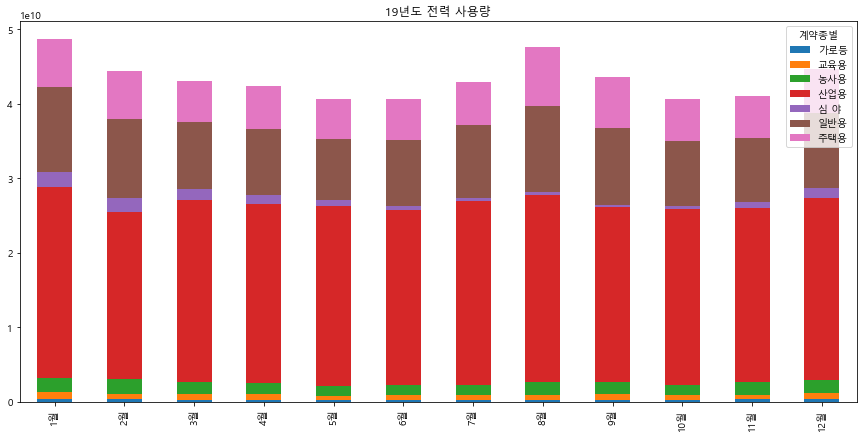

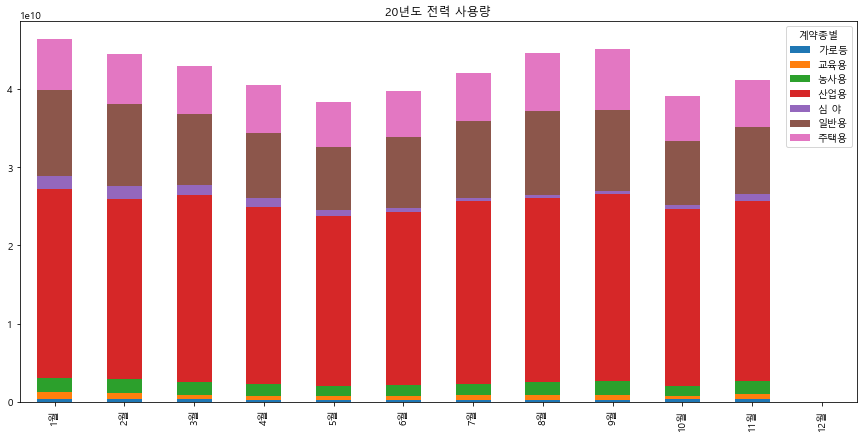

In [64]:
plt.rcParams["figure.figsize"] = (15, 7)      # 19,20년의 사용량을 사용하는 종류별로 월별 사용량 확인하게 표현
fig = plt.figsize = (15,20)
plt.rc('font', family='Malgun Gothic')

elec19_2.plot(kind='bar', stacked=True)
plt.title('19년도 전력 사용량')

elec20_2.plot(kind='bar', stacked=True)
plt.title('20년도 전력 사용량')

plt.show()

### 19년, 20년의 사용량 그래프화

In [68]:
corona_elec=pd.concat([elec19_2, elec20_2])    # 2파일의 전처리 이후 합침
corona_elec

계약종별,가로등,교육용,농사용,산업용,심 야,일반용,주택용
1월,342736683,962224365,1918843890,25660039172,1936721494,11375174713,6449168901
2월,324207282,784635417,1893947866,22506320614,1875076501,10635261597,6334541199
3월,299358592,737945402,1590358352,24489660156,1411600930,9042630619,5517458926
4월,294350932,721390249,1498547339,24087148815,1216447651,8846691921,5776292707
5월,276270065,566036402,1285018132,24151605939,761093808,8294129479,5374064352
6월,265781174,598726105,1331644714,23606875903,464601656,8892566168,5459820076
7월,258205870,674697029,1346574783,24608976874,401015781,9891506395,5785446735
8월,271912474,670107596,1684766498,25103227505,387809185,11631897450,7808977265
9월,283989523,709237055,1648081718,23468890902,340022364,10350103060,6849191920
10월,301940540,586637292,1299522425,23729340619,421746754,8701539228,5582329267


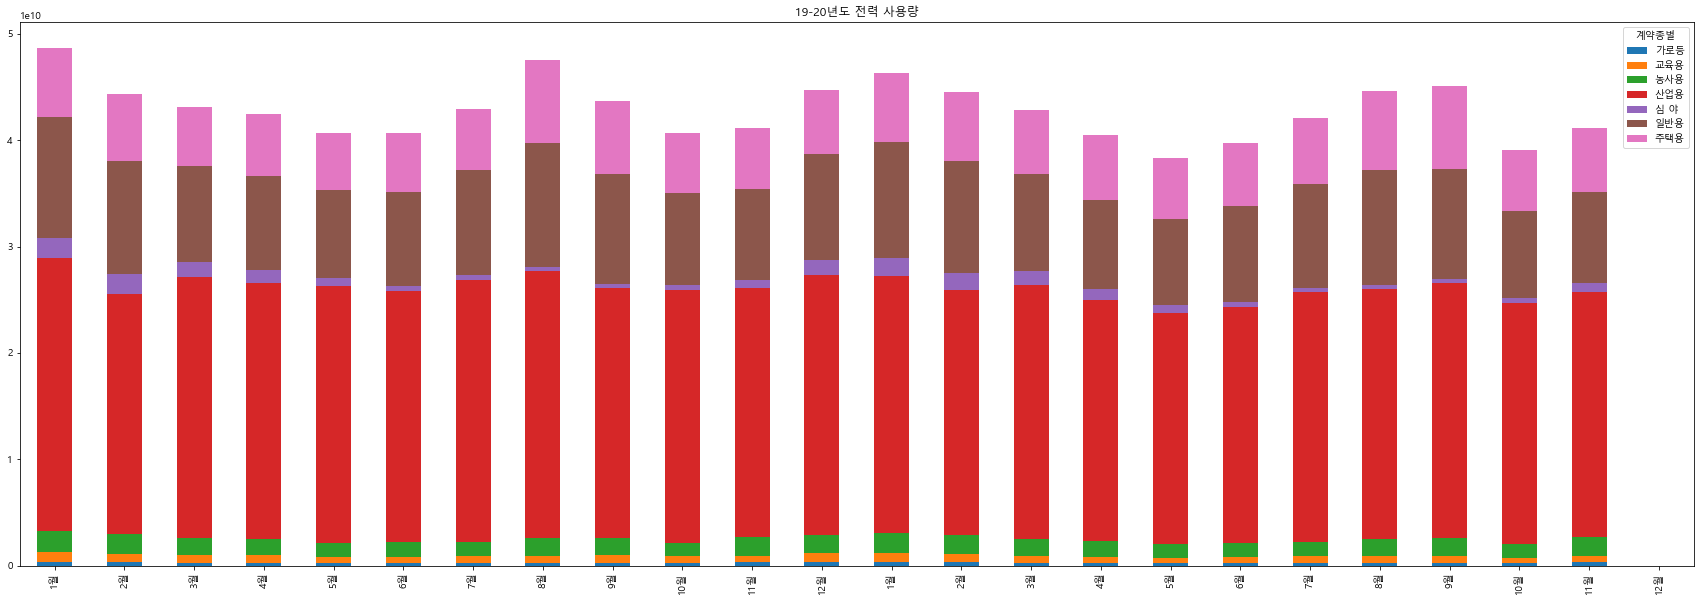

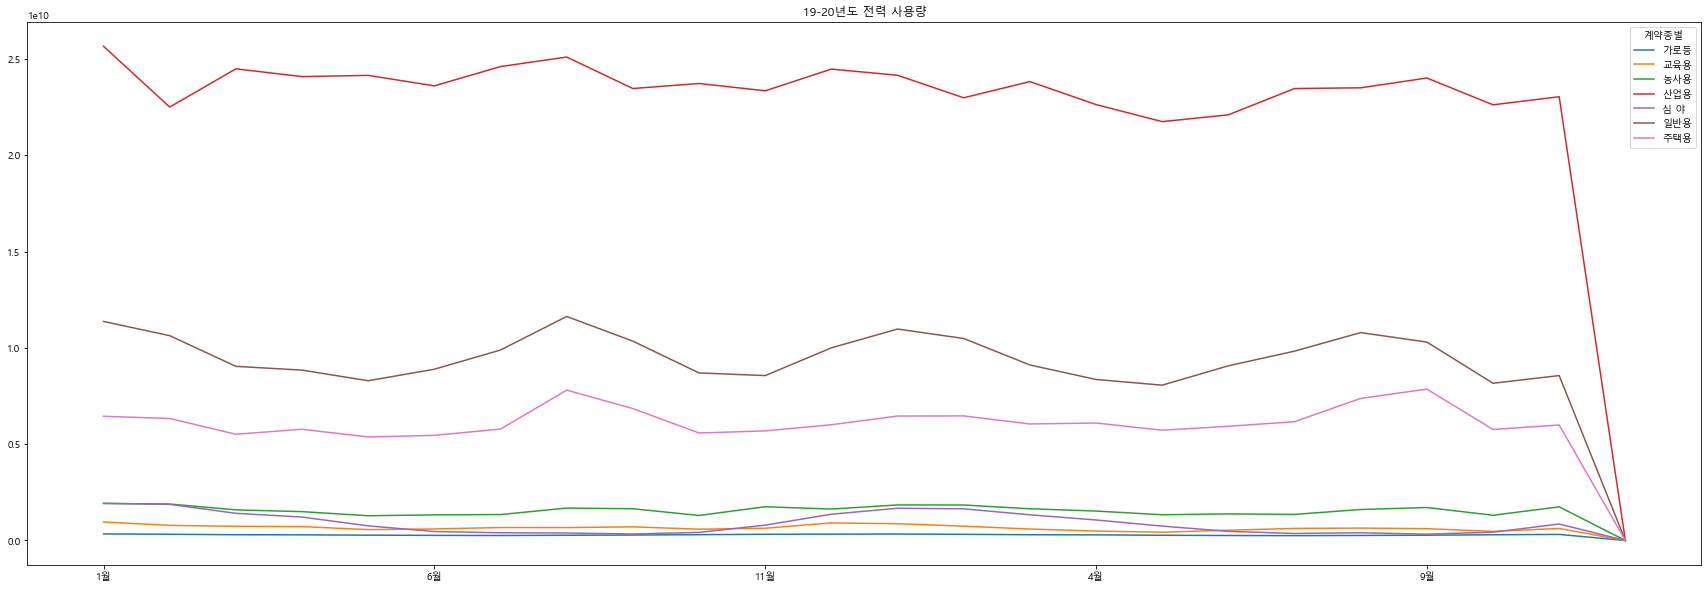

In [85]:
plt.rcParams["figure.figsize"] = (30, 10)
fig = plt.figsize = (15,10)
plt.rc('font', family='Malgun Gothic')

corona_elec.plot(kind='bar', stacked=True)      # 전체 사용량과 함께볼수 있게 stacked 사용
plt.title('19-20년도 전력 사용량')
corona_elec.plot(kind='line')     # 사용량 자체 비교
plt.title('19-20년도 전력 사용량')
plt.show()

- 주택용, 농사용의 경우 전체적으로 사용량 증가
- 가로등용의 경우 소폭 하향
- 교육용 대폭 하락.
- 산업용의 경우 3-5월까지 사용량 일시적 하락, 이후 점차 사용량 증가하나 역시 전년도보다 사용량이 적음
- 심야용의 경우 3-4월 하락이 있었으나, 이후 사용량이 19년도와 비슷하게 변화
- 일반용은 전년도와 비교시 약간의 등락은 있으나 전체적으로 하락
- 19- 20년 모두 3-5월 내려간 소비량이 6월부터 다시 상승하나, 20년도는 상승세의 기울기가 높지않고 완만함을 그린다. 즉 덜 사용하였다.

# 2020년 총전력 소비량

In [14]:
elec = pd.read_excel('./hanelec2020.xlsx', header = 2)
elec4 = elec.copy()                                                       
elec4

,연도,시도,시군구,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2020,서울특별시,종로구,주택용,23282355,22805944,21157407,20528809,19532519,21593865,23510494,26870726,26624205,19920762,20468684,0
1,2020,서울특별시,종로구,일반용,114495623,105338838,94326383,83914212,83334611,98931540,107842159,112964562,102740211,81058173,86290766,0
2,2020,서울특별시,종로구,교육용,9559773,8855042,6872377,5909347,5559426,7043982,7934770,8415305,8034215,5951326,7044572,0
3,2020,서울특별시,종로구,산업용,6335667,6493638,6251995,5800648,5255774,6095093,6437129,5732473,6274032,4784933,5292240,0
4,2020,서울특별시,종로구,농사용,4382,3711,3240,2617,1477,933,799,724,585,529,870,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,2020,세종특별자치시,세종시,합 계,288844593,283274957,280548852,264606519,252302181,269349039,284686589,294023468,310726055,266062281,288055505,0
1830,2020,황해북도,개성시,주택용,10598,0,5299,2650,2650,0,721,0,0,0,25140,0
1831,2020,황해북도,개성시,일반용,0,326406,102394,50873,51817,1505,27638,0,0,0,482824,0
1832,2020,황해북도,개성시,산업용,0,181140,78310,40166,40166,2020,22115,0,0,0,396468,0


In [15]:
elec4 = elec4[elec4['계약종별']=='합 계']     #합계 데이터가 있다
elec4

,연도,시도,시군구,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
7,2020,서울특별시,종로구,합 계,157559179,147177703,131744572,118905158,117786245,139980432,152201802,161498325,148881126,114368410,121446941,0
14,2020,서울특별시,중구,합 계,210225592,197595615,177496746,158482902,160376648,193879018,211437041,221799565,203402512,154318009,162227767,0
21,2020,서울특별시,용산구,합 계,122232387,117179185,103942408,95868603,92639911,107892097,120941343,132868312,128605027,97247968,100453115,0
29,2020,서울특별시,성동구,합 계,193122842,185623818,171859245,162785602,155560349,170989206,185644436,198468980,198967232,157050722,161710034,0
37,2020,서울특별시,동대문구,합 계,128231205,124314303,111638570,104361179,98153792,109417609,121934348,130701416,132175644,99387653,103877142,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,2020,경상남도,합천군,합 계,41074081,40145563,34887474,32328541,28239668,29383329,29905304,31673410,33369175,27946512,34878357,0
1813,2020,제주특별자치도,제주시,합 계,284289541,279664630,255405663,250510257,235536190,247732262,261731071,321269302,305002532,241175965,252790608,0
1821,2020,제주특별자치도,서귀포시,합 계,206830023,212580042,195965338,194750672,173039085,160483183,162726307,190410103,176906145,149594357,158608726,0
1829,2020,세종특별자치시,세종시,합 계,288844593,283274957,280548852,264606519,252302181,269349039,284686589,294023468,310726055,266062281,288055505,0


In [16]:
elec4 = elec4.drop(['시도','연도','시군구','계약종별'],axis=1)
elec4

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
7,157559179,147177703,131744572,118905158,117786245,139980432,152201802,161498325,148881126,114368410,121446941,0
14,210225592,197595615,177496746,158482902,160376648,193879018,211437041,221799565,203402512,154318009,162227767,0
21,122232387,117179185,103942408,95868603,92639911,107892097,120941343,132868312,128605027,97247968,100453115,0
29,193122842,185623818,171859245,162785602,155560349,170989206,185644436,198468980,198967232,157050722,161710034,0
37,128231205,124314303,111638570,104361179,98153792,109417609,121934348,130701416,132175644,99387653,103877142,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1805,41074081,40145563,34887474,32328541,28239668,29383329,29905304,31673410,33369175,27946512,34878357,0
1813,284289541,279664630,255405663,250510257,235536190,247732262,261731071,321269302,305002532,241175965,252790608,0
1821,206830023,212580042,195965338,194750672,173039085,160483183,162726307,190410103,176906145,149594357,158608726,0
1829,288844593,283274957,280548852,264606519,252302181,269349039,284686589,294023468,310726055,266062281,288055505,0


In [29]:
elec4.sum()

1월     46326915504
2월     44498867363
3월     42870785075
4월     40475289884
5월     38327715502
6월     39752893138
7월     42067819559
8월     44599216076
9월     45110791953
10월    39065311554
11월    41147087280
12월              0
dtype: int64

In [17]:
elec_sum20= elec4.sum()
elec_sum20= pd.DataFrame(elec_sum20, columns=['2020년 총전력사용량'])   # 전체를 월별로 더해 새로 데이터프레임생성
elec_sum20

,2020년 총전력사용량
1월,46326915504
2월,44498867363
3월,42870785075
4월,40475289884
5월,38327715502
6월,39752893138
7월,42067819559
8월,44599216076
9월,45110791953
10월,39065311554


# 2019년 총전력 소비량

In [18]:
elec = pd.read_excel('./hanelec2019.xlsx', header = 2)
elec5 = elec.copy()                                                       
elec5

,연도,시도,시군구,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2019,서울특별시,종로구,주택용,24160644,22883203,20039084,20570833,19156656,20278012,22919604,29492782,24800305,20050769,20033320,21855205
1,2019,서울특별시,종로구,일반용,120079512,110317701,93294299,93421543,90325483,98303377,113573453,126148808,110010554,93117616,90242284,106536361
2,2019,서울특별시,종로구,교육용,10204144,9435056,7662196,7881974,6729563,7825646,8631354,9303561,9002269,7322515,7300834,9780051
3,2019,서울특별시,종로구,산업용,6683559,6900078,6731342,7095902,6192349,6372283,6403721,6859148,7011859,5961664,5682268,6223492
4,2019,서울특별시,종로구,농사용,7065,5975,4408,4559,985,754,673,840,741,621,592,3358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,2019,세종특별자치시,세종시,합 계,292024552,266667611,259635613,259582358,250007849,255500866,274188634,289289047,276593028,260172385,263660812,278856325
1830,2019,황해북도,개성시,주택용,10937,9169,9446,7492,6678,6890,8939,10516,8348,7646,9284,10598
1831,2019,황해북도,개성시,일반용,348006,251923,190158,138255,90389,87695,111074,124581,98703,107756,197942,326406
1832,2019,황해북도,개성시,산업용,166936,142981,139741,120540,116713,111140,119631,127520,119255,122606,138500,181140


In [19]:
elec5 = elec5[elec5['계약종별']=='합 계'] 
elec5

,연도,시도,시군구,계약종별,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
7,2019,서울특별시,종로구,합 계,165504904,153754373,131097943,132293897,126807673,138046858,158911463,179802759,156745415,130003013,125768578,147816927
14,2019,서울특별시,중구,합 계,224851527,200944059,183761242,181407718,185449539,201645997,234578928,257048160,222574244,187652945,176337957,204481542
21,2019,서울특별시,용산구,합 계,130463604,121860406,103918492,104579326,100158523,110436568,126275512,150937277,130873366,105764031,101368748,115338721
29,2019,서울특별시,성동구,합 계,201405401,189139123,167567034,170525330,162034419,170563015,186121920,217964252,197120005,167557584,164818752,183082845
37,2019,서울특별시,동대문구,합 계,135701421,128384670,110087635,110138879,101359753,109559259,121930588,147212933,133082754,107665158,104151713,119410912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1805,2019,경상남도,합천군,합 계,41576881,40810783,33734677,32201715,26530293,28050110,28167878,32874228,30742962,27608366,32316117,36460150
1813,2019,제주특별자치도,제주시,합 계,289683424,280466251,252776399,254891335,235387329,239730690,253645682,315452052,283773879,247097847,245898935,261357687
1821,2019,제주특별자치도,서귀포시,합 계,215311493,224601169,198954951,205125348,177759275,164354170,166425331,192013206,177730266,155751510,158097035,177999357
1829,2019,세종특별자치시,세종시,합 계,292024552,266667611,259635613,259582358,250007849,255500866,274188634,289289047,276593028,260172385,263660812,278856325


In [20]:
elec5 = elec5.drop(['시도','연도','시군구','계약종별'],axis=1)
elec5

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
7,165504904,153754373,131097943,132293897,126807673,138046858,158911463,179802759,156745415,130003013,125768578,147816927
14,224851527,200944059,183761242,181407718,185449539,201645997,234578928,257048160,222574244,187652945,176337957,204481542
21,130463604,121860406,103918492,104579326,100158523,110436568,126275512,150937277,130873366,105764031,101368748,115338721
29,201405401,189139123,167567034,170525330,162034419,170563015,186121920,217964252,197120005,167557584,164818752,183082845
37,135701421,128384670,110087635,110138879,101359753,109559259,121930588,147212933,133082754,107665158,104151713,119410912
...,...,...,...,...,...,...,...,...,...,...,...,...
1805,41576881,40810783,33734677,32201715,26530293,28050110,28167878,32874228,30742962,27608366,32316117,36460150
1813,289683424,280466251,252776399,254891335,235387329,239730690,253645682,315452052,283773879,247097847,245898935,261357687
1821,215311493,224601169,198954951,205125348,177759275,164354170,166425331,192013206,177730266,155751510,158097035,177999357
1829,292024552,266667611,259635613,259582358,250007849,255500866,274188634,289289047,276593028,260172385,263660812,278856325


In [21]:
elec_sum19= elec5.sum()
elec_sum19= pd.DataFrame(elec_sum19, columns=['2019년 총전력사용량'])
elec_sum19

,2019년 총전력사용량
1월,48644909218
2월,44353990476
3월,43089012977
4월,42440869614
5월,40708218177
6월,40620015796
7월,42966423467
8월,47558697973
9월,43649516542
10월,40623056125


# 2019-2020년 총 전력사용량 그래프 비교

<AxesSubplot:ylabel='2019년 총전력사용량'>

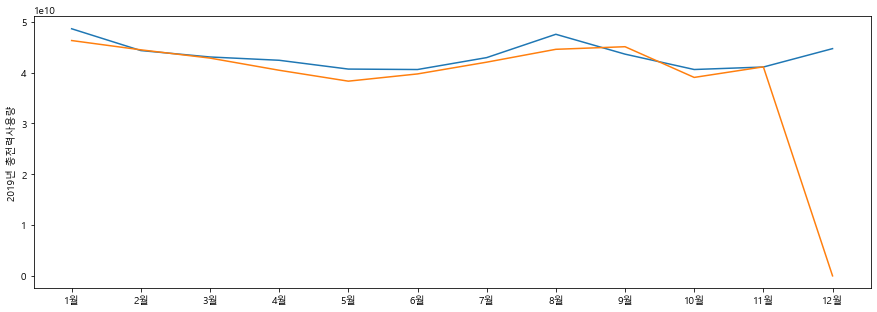

In [31]:
plt.rcParams["figure.figsize"] = (15, 5)       #그래프를 이용하여 확인
fig = plt.figsize = (15,10)
plt.rc('font', family='Malgun Gothic')

sns.lineplot(x=elec_sum19.index, y='2019년 총전력사용량', data=elec_sum19)
sns.lineplot(x=elec_sum20.index, y='2020년 총전력사용량', data=elec_sum20)

### 총전력 사용량의 경우

- 코로나로 인해 패닉이 생겼던 3월부터 계속하여 전력사용량이 줄어듬
- 9월의 사용량은 잠시 증가
- 20년 12월은 데이터가 없음

## 결론
- 코로나 패닉으로 있던 3월부터 집밖으로 나가는 일이 줄어 주택용 전기사용의 증가
- 반면 농사용은 코로나와 상관없이 증가하였음이 확인
- 교육용 대폭 하락. 정부의 등교 제한 정책으로 인해 보임.
- 산업용의 경우 3-5월까지 코로나 패닉으로 인해 유동인구가 줄어들며 산업전체가 경직되어 사용량 하락
- 심야용의 경우 3-4월 상당량 하락이 있었으나, 이후 사용량이 19년도와 비슷하게 변화
- 일반용 또한 사용량 하락

### 경제자체가 경직되어가며 대부분의 전력 사용량 또한 확연히 하락. 반면 주택용 사용량이 증가하였는데, 이는 코로나 패닉으로 집에서 나가지 않고 생활하는 경우가 많았다고 추측이 가능